<a href="https://colab.research.google.com/github/Ayantika19/Data-Analysis-COVID-19-US/blob/main/COVID_19_PREDICTION_USING_X_RAY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Upload google drive in our COLAB

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:

# install tensorflow version 2
%tensorflow_version 2.x



In [ ]:
# Importing library

import tensorflow.keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Activation, Flatten, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, ConfusionMatrixDisplay
import numpy as np


In [ ]:
# Create path

train_loc = '/content/drive/My Drive/COVID_19_DATASET_SHREOSHI/train/'
test_loc = '/content/drive/My Drive/COVID_19_DATASET_SHREOSHI/val/'

In [ ]:
# resize images 

trdata = ImageDataGenerator(rescale= 1./255,
                            shear_range = 0.2,
                            zoom_range = 0.2,
                            horizontal_flip = True,
)

traindata = trdata.flow_from_directory(directory = train_loc, target_size = (224,224))

tsdata = ImageDataGenerator(rescale= 1./255,
                            shear_range = 0.2,
                            zoom_range = 0.2,
                            horizontal_flip = True,
)

testdata = tsdata.flow_from_directory(directory = test_loc, target_size = (224,224))

Found 250 images belonging to 2 classes.
Found 110 images belonging to 2 classes.


In [ ]:
traindata.class_indices

{'COVID+': 0, 'COVID-': 1}

In [ ]:
# define input image
input_shape = (224,224,3)

# create the Network
# Input layer
img_imput = Input(shape  = input_shape, name = 'img_input')

# Convo layers
x = Conv2D(32, (3,3) , padding = 'same' , activation='relu', name = 'layer_1') (img_imput)
x = Conv2D(64, (3,3) , padding = 'same' , activation='relu', name = 'layer_2') (x)
x = MaxPool2D((2,2), strides=(2,2), name = 'layer_3') (x)
x = Dropout(0.25)(x)

x = Conv2D(64, (3,3) , padding = 'same' , activation='relu', name = 'layer_4') (x)
x = MaxPool2D((2,2), strides=(2,2), name = 'layer_5') (x)
x = Dropout(0.25)(x)

x = Conv2D(128, (3,3) , padding = 'same' , activation='relu', name = 'layer_6') (x)
x = MaxPool2D((2,2), strides=(2,2), name = 'layer_7') (x)
x = Dropout(0.25)(x)

x = Flatten(name = 'fc_1')(x)
x= Dense(64, name = 'layer_8')(x)
x = Dropout(0.5) (x)
x = Dense(2, activation='sigmoid', name='predictions')(x)

In [ ]:
# Generate the model
model = Model(inputs = img_imput, outputs =x , name='CNN_COVID_19')

In [ ]:
# Print network structure
model.summary()

Model: "CNN_COVID_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img_input (InputLayer)       [(None, 224, 224, 3)]     0         
_________________________________________________________________
layer_1 (Conv2D)             (None, 224, 224, 32)      896       
_________________________________________________________________
layer_2 (Conv2D)             (None, 224, 224, 64)      18496     
_________________________________________________________________
layer_3 (MaxPooling2D)       (None, 112, 112, 64)      0         
_________________________________________________________________
dropout (Dropout)            (None, 112, 112, 64)      0         
_________________________________________________________________
layer_4 (Conv2D)             (None, 112, 112, 64)      36928     
_________________________________________________________________
layer_5 (MaxPooling2D)       (None, 56, 56, 64)       

In [ ]:
# Compiling the model
model.compile(optimizer='adam', loss=binary_crossentropy, metrics=['accuracy'])

In [ ]:
# start Train/Test
batch_size = 34
hist = model.fit(traindata, steps_per_epoch = traindata.samples//batch_size,
                 validation_data = testdata,validation_steps = testdata.samples//batch_size,
                 epochs = 10
                 )

Epoch 1/10
7/7 [==============================] - 201s 29s/step - loss: 1.2141 - accuracy: 0.6881 - val_loss: 0.5849 - val_accuracy: 0.6979
Epoch 2/10
7/7 [==============================] - 68s 10s/step - loss: 0.4256 - accuracy: 0.8394 - val_loss: 0.3433 - val_accuracy: 0.8958
Epoch 3/10
7/7 [==============================] - 68s 10s/step - loss: 0.3425 - accuracy: 0.8853 - val_loss: 0.3809 - val_accuracy: 0.9271
Epoch 4/10
7/7 [==============================] - 68s 10s/step - loss: 0.3100 - accuracy: 0.8945 - val_loss: 0.2887 - val_accuracy: 0.9479
Epoch 5/10
7/7 [==============================] - 68s 10s/step - loss: 0.2781 - accuracy: 0.9083 - val_loss: 0.4330 - val_accuracy: 0.9271
Epoch 6/10
7/7 [==============================] - 68s 10s/step - loss: 0.2741 - accuracy: 0.8945 - val_loss: 0.2187 - val_accuracy: 0.9688
Epoch 7/10
7/7 [==============================] - 69s 10s/step - loss: 0.1847 - accuracy: 0.9509 - val_loss: 0.3057 - val_accuracy: 0.9688
Epoch 8/10
7/7 [==========

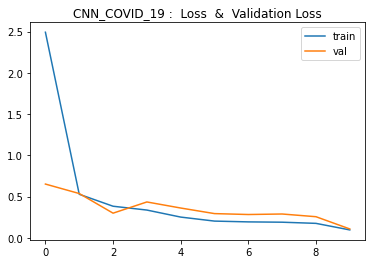

In [ ]:
plt.plot(hist.history['loss'], label = 'train')
plt.plot(hist.history['val_loss'], label = 'val')
plt.title('CNN_COVID_19 :  Loss  &  Validation Loss')
plt.legend()
plt.show()

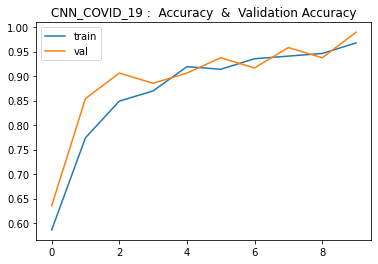

In [ ]:
plt.plot(hist.history['accuracy'], label = 'train')
plt.plot(hist.history['val_accuracy'], label = 'val')
plt.title('CNN_COVID_19 :  Accuracy  &  Validation Accuracy')
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2001: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Confusion Matrix
[[31 24]
 [26 29]]
classification_Report
              precision    recall  f1-score   support

      COVID+       0.54      0.56      0.55        55
      COVID-       0.55      0.53      0.54        55

    accuracy                           0.55       110
   macro avg       0.55      0.55      0.55       110
weighted avg       0.55      0.55      0.55       110



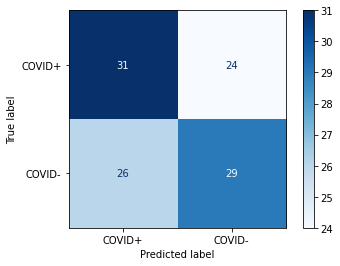

In [ ]:
# Confusion Matrix  & Pres  & Recall   & F1-Score

target_names = ['COVID+', 'COVID-']
label_names = [0,1]

Y_pred = model.predict_generator(testdata)
y_pred = np.argmax(Y_pred ,  axis = 1)

cm = confusion_matrix(testdata.classes, y_pred, labels = label_names)


print('Confusion Matrix')
print(confusion_matrix(testdata.classes, y_pred))

print('classification_Report')
print(classification_report(testdata.classes, y_pred, target_names=target_names))

disp = ConfusionMatrixDisplay(confusion_matrix= cm, display_labels=target_names)
disp = disp.plot(cmap=plt.cm.Blues, values_format = 'g')
plt.show()
